In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')

In [15]:
#reading in the .csv file

tanza_data = pd.read_csv("training.csv")


In [16]:
#checking for missing values in the dataset
tanza_data.isnull().sum()
print(tanza_data.isnull().sum())

ID                             0
Q1                             0
Q2                             0
Q3                             0
Q4                             0
Q5                             0
Q6                             0
Q7                             0
Q8_1                           0
Q8_2                           0
Q8_3                           0
Q8_4                           0
Q8_5                           0
Q8_6                           0
Q8_7                           0
Q8_8                           0
Q8_9                           0
Q8_10                          0
Q8_11                          0
Q9                             0
Q10                            0
Q11                            0
Q12                            0
Q13                            0
Q14                            0
Q15                            0
Q16                            0
Q17                            0
Q18                            0
Q19                            0
Latitude  

**There are no missing values in the dataset in any of the columns in the dataset**

In [17]:
#summary of the statistics
tanza_data.describe()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
count,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,...,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000
mean,4742.627291,38.239498,1.559910,1.787426,3.060051,2.548915,1.840569,1.397942,0.062165,0.630110,...,-0.431914,1.860164,3.163378,-6.034378,35.354029,0.553989,0.461517,0.432901,0.151255,1.799267
std,2731.120086,16.332148,0.496433,1.165160,1.557779,1.534257,0.366103,0.489508,0.241472,0.482809,...,1.489879,1.351372,1.317691,2.720888,2.899511,0.497112,0.498552,0.495512,0.358322,1.196955
min,1.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,-1.000000,1.000000,1.000000,-11.467463,29.639578,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2397.250000,25.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,...,-1.000000,1.000000,2.000000,-8.275387,32.935429,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4744.500000,35.000000,2.000000,1.000000,3.000000,3.000000,2.000000,1.000000,0.000000,1.000000,...,-1.000000,1.000000,4.000000,-6.087854,35.073326,1.000000,0.000000,0.000000,0.000000,2.000000
75%,7105.000000,48.000000,2.000000,3.000000,3.000000,4.000000,2.000000,2.000000,0.000000,1.000000,...,-1.000000,4.000000,4.000000,-3.517053,38.351815,1.000000,1.000000,1.000000,0.000000,3.000000
max,9459.000000,100.000000,2.000000,4.000000,8.000000,6.000000,2.000000,2.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,-1.084000,40.258744,1.000000,1.000000,1.000000,1.000000,3.000000


In [18]:
#total number of females and males interviewed
male = tanza_data[tanza_data['Q2'] == 1]
female = tanza_data[tanza_data['Q2'] == 2]
male.describe()
female.describe()


,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
count,3972.000000,3972.000000,3972.0,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,...,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000
mean,4758.365811,37.479607,2.0,1.799345,2.898036,2.687059,1.877392,1.478097,0.044058,0.594914,...,-0.496224,2.031722,3.319486,-6.016893,35.366889,0.496224,0.424723,0.401309,0.153072,1.648036
std,2725.863440,16.084996,0.0,1.103220,1.520257,1.485938,0.328028,0.499583,0.205251,0.490970,...,1.392767,1.420433,1.240382,2.734942,2.892068,0.500049,0.494363,0.490225,0.360102,1.206876
min,2.000000,16.000000,2.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,-1.000000,1.000000,1.000000,-11.466611,29.639578,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2411.500000,25.000000,2.0,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,...,-1.000000,1.000000,2.000000,-8.240882,32.957542,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4774.000000,34.000000,2.0,1.000000,3.000000,3.000000,2.000000,1.000000,0.000000,1.000000,...,-1.000000,1.000000,4.000000,-6.072129,35.073337,0.000000,0.000000,0.000000,0.000000,1.000000
75%,7107.500000,46.000000,2.0,3.000000,3.000000,4.000000,2.000000,2.000000,0.000000,1.000000,...,-1.000000,4.000000,4.000000,-3.487150,38.327971,1.000000,1.000000,1.000000,0.000000,3.000000
max,9457.000000,100.000000,2.0,4.000000,7.000000,6.000000,2.000000,2.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,-1.084000,40.258744,1.000000,1.000000,1.000000,1.000000,3.000000


There were 3122 males and 3972 female interviewed

** Representation of the relationship between financial services accessed and GENDER **

Text(0.5, 1.0, "Comparison of all Males' use of Financial Services")

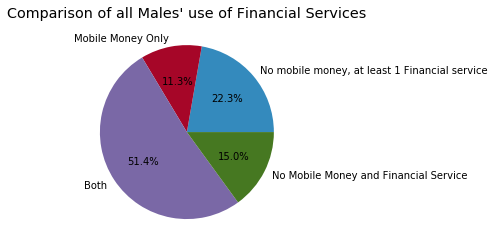

In [19]:
#comparison of males with mobile money and males without mobile money
total_males = len(male[male.mobile_money == 1]) + len(male[male.mobile_money == 0])

l = len(male[male.mobile_money_classification == 1]) / total_males * 100
m = len(male[male.mobile_money_classification == 2]) / total_males * 100
n = len(male[male.mobile_money_classification == 3]) / total_males * 100
o = len(male[male.mobile_money_classification == 0]) / total_males * 100

labels= ['No mobile money, at least 1 Financial service', 'Mobile Money Only', 'Both', 'No Mobile Money and Financial Service']
plt.pie([l, m, n, o], explode=None,autopct='%1.1f%%', labels= labels)
plt.title("Comparison of all Males' use of Financial Services")

In [20]:
no_mobile_money = len(male[male.mobile_money_classification == 0])
no_mm_one_service = len(male[male.mobile_money_classification == 1])
mobile_money_only = len(male[male.mobile_money_classification == 2])
both = len(male[male.mobile_money_classification == 3])

print(no_mobile_money)
print(no_mm_one_service)
print(mobile_money_only)
print(both)

468
695
354
1605


Out of the 3122 females that were interviewed:

468 had no mobile money and no other financial service (saving, borrowing, insurance)

695 had no mobile money, but at least one other financial service

354 had mobile money only

1605 had both  mobile money and at least one other financial service

Text(0.5, 1.0, "Comparison of all Females' use of financial services")

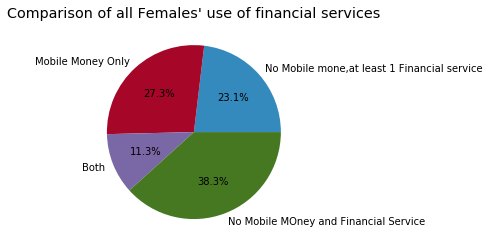

In [21]:
#comparison of females with mobile money and females without mobile money

total_females = len(female[female.mobile_money_classification == 1]) + len(female[female.mobile_money_classification == 2]) + len(female[female.mobile_money_classification == 3])

p = len(female[female.mobile_money_classification == 0]) / total_females * 100
q = len(female[female.mobile_money_classification == 1]) / total_females * 100
r = len(female[female.mobile_money_classification == 2]) / total_females * 100
s = len(female[female.mobile_money_classification == 3]) / total_females * 100
labels= ['No Mobile mone,at least 1 Financial service', 'Mobile Money Only', 'Both', 'No Mobile MOney and Financial Service']
plt.pie([p, q, r, s], explode=None,autopct='%1.1f%%', labels= labels)
plt.title("Comparison of all Females' use of financial services")

In [22]:
fm_no_mobile_money = len(female[female.mobile_money_classification == 0])
fm_no_mm_one_service = len(female[female.mobile_money_classification == 1])
fm_mobile_money_only = len(female[female.mobile_money_classification == 2])
fm_both = len(female[female.mobile_money_classification == 3])

print(fm_no_mobile_money)
print(fm_no_mm_one_service)
print(fm_mobile_money_only)
print(fm_both)

918
1083
450
1521


Out of the 3122 females that were interviewed:

918 had no mobile money and no other financial service (saving, borrowing, insurance)

1083 had no mobile money, but at least one other financial service

* 450 had mobile money only

1521 had both  mobile money and at least one other financial service

Renaming of Columns

In [23]:
file= tanza_data.rename(columns={
    'Q1': 'Age',
    'Q2': 'Gender',
    'Q3': 'Marital status',
    'Q4': 'Education Highest Level',
    'Q5': 'Ownership Of Land',
    'Q6': 'Land Ownership',
    'Q7': 'Mobile phone ownership',
    'Q8_1': 'Wages',
    'Q8_2': 'Trading',
    'Q8_3': 'Providing service',
    'Q8_4': 'Casual labour',
    'Q8_5': 'Rental',
    'Q8_6': 'money interest',
    'Q8_7': 'Pension',
    'Q8_8': 'Social welfare',
    'Q8_9': 'Money financially dependant',
    'Q8_10': 'Money no income',
    'Q8_11': 'Other',
    'Q9': 'Salary and wages',
    'Q10': 'Selling goods',
    'Q11': 'Kind of service',
    'Q12': 'Money sent',
    'Q13': 'Last money sent',
    'Q14': 'Money received',
    'Q15': 'Last money received',
    'Q16': 'Mobile money purchases',
    'Q17': 'Mobile money bills',
    'Q18': 'Kwiswhahili literacy',
    'Q19': 'English literacy' 
    
}, inplace=True
                       )

In [24]:
marital_stat = {1:'Married', 2:'Divorced', 3:'Widowed', 4:'Single'}
tanza_data['Marital status'] = tanza_data['Marital status'].map(marital_stat)

gender = {1:'Male', 2:'Female'}
tanza_data['Gender'] = tanza_data['Gender'].map(gender)

mm_classification = {0:'None', 1:'MM_Plus', 2:'MM_Only', 3:'Other_Only'}
tanza_data['mobile_money_classification'] = tanza_data['mobile_money_classification'].map(mm_classification)

l_ownership = {1:'Yes', 2:'No'}
tanza_data['Land Ownership'] = tanza_data['Land Ownership'].map(l_ownership)

trading = {0:'No', 1:'Yes'}
tanza_data['Trading'] = tanza_data['Trading'].map(trading)

services = {0:'No', 1:'Yes'}
tanza_data['Providing service'] = tanza_data['Providing service'].map(services)

casual= {0:'No', 1:'Yes'}
tanza_data['Casual labour'] = tanza_data['Casual labour'].map(casual)

rent_income = {0:'No', 1:'Yes'}
tanza_data['Rental'] = tanza_data['Rental'].map(rent_income)

interest = {0:'No', 1:'Yes'}
tanza_data['money interest'] = tanza_data['money interest'].map(interest)

pension = {0:'No', 1:'Yes'}
tanza_data['Pension'] = tanza_data['Pension'].map(pension)

social_welfare= {1:'Yes', 0:'No'}
tanza_data['Social welfare'] = tanza_data['Social welfare'].map(social_welfare)

financially_dependant = {1:'Yes', 0:'No'}
tanza_data['Money financially dependant'] = tanza_data['Money financially dependant'].map(financially_dependant)

no_income = {0:'No', 1:'Yes'}
tanza_data['Money no income'] = tanza_data['Money no income'].map(no_income)

other_income= {0:'No', 1:'Yes'}
tanza_data['Other'] = tanza_data['Other'].map(other_income)

money_sent= {1:'Yes', 2:'No'}
tanza_data['Money sent'] = tanza_data['Money sent'].map(money_sent)

money_last_sent= {-1:'N/A', 4:'90 days', 2:'7 days', 5:'less than 6months', 3:'30 days', 6:'more than 6months', 1:'Yesterday/today'}
tanza_data['Last money sent'] = tanza_data['Last money sent'].map(money_last_sent)

money_received= {1:'Yes', 2:'No'}
tanza_data['Money received'] = tanza_data['Money received'].map(money_received)

last_money_received= {-1:'N/A', 1:'Never', 2:'Daily', 3:'Weekly', 4:'Monthly', 5:'less often than monthly'}
tanza_data['Last money received'] = tanza_data['Last money received'].map(last_money_received)

mm_purchases = {-1:'N/A', 1:'Never', 2:'Daily', 3:'Weekly', 4:'Monthly', 5:'less often than monthly'}
tanza_data['Mobile money purchases'] = tanza_data['Mobile money purchases'].map(mm_purchases)

mm_bills= {-1:'N/A', 1:'Never', 2:'Daily', 3:'Weekly', 4:'Monthly', 5:'less often than monthly'}
tanza_data['Mobile money bills'] = tanza_data['Mobile money bills'].map(mm_bills)



**Relationship between Mobile money Classification and Age**

Text(0.5, 1, 'Mobile money classification vs Age')

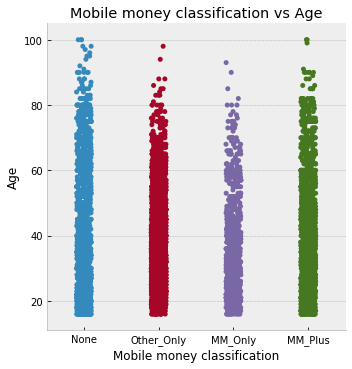

In [25]:
sns.catplot(x='mobile_money_classification', y='Age', data=tanza_data)
plt.xlabel("Mobile money classification")
plt.ylabel("Age")
plt.title('Mobile money classification vs Age')

**Relationship between Marital status and financnial services used**

#Seperation of individuals through marital status
married = tanza_data[tanza_data.Q3 == 1]
dirvoced = tanza_data[tanza_data.Q3 == 2]
widowed = tanza_data[tanza_data.Q3 == 3]
single= tanza_data[tanza_data.Q3 == 4]

relation_stat = [married, dirvoced, widowed, single]

relation_stat

Text(0.5, 1, 'Mobile money classification vs Marital Status')

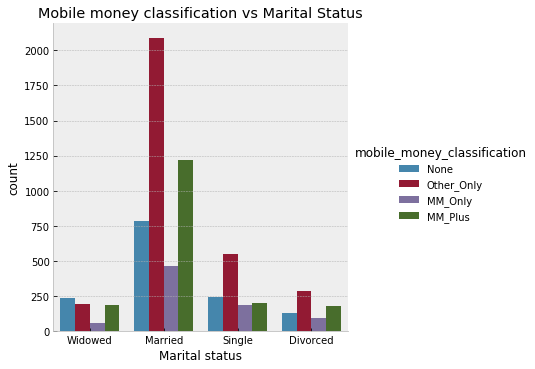

In [26]:
sns.catplot(x='Marital status',kind='count', hue='mobile_money_classification', data= tanza_data)
plt.title('Mobile money classification vs Marital Status')

**Relationship between Financial services used and Land Ownership **

Text(0.5, 1, 'Mobile money classification vs Land Ownership')

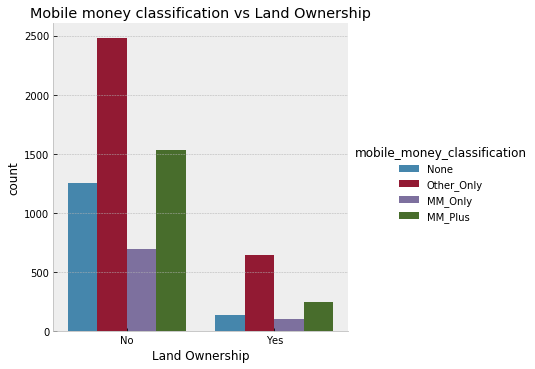

In [27]:
sns.catplot(x='Land Ownership',kind='count', hue='mobile_money_classification', data= tanza_data)
plt.title('Mobile money classification vs Land Ownership')

Types of income

In [28]:
# determining different types of income
rem = tanza_data.loc[:, 'Salary and wages':'Other']
rem['mobile_money'] = tanza_data['mobile_money']
rem = pd.melt(rem, id_vars = ['mobile_money'], var_name='Types_of_income') 
rem = rem[rem['value'] == "Yes"]
rem.Types_of_income.value_counts()


/home/allen/miniconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Series([], Name: Types_of_income, dtype: int64)

In [29]:
sns.countplot(y='Types_of_income', hue= 'mobile_money_classification', data= tanza_data)
plt.ylabel('Income Type')

ValueError: Could not interpret input 'Types_of_income'

**Relationship between how often financial services are used and gender **

purchusing of goods and/or services


Text(0.5, 1.0, 'Mobile money use in the past 12 months for purchases')

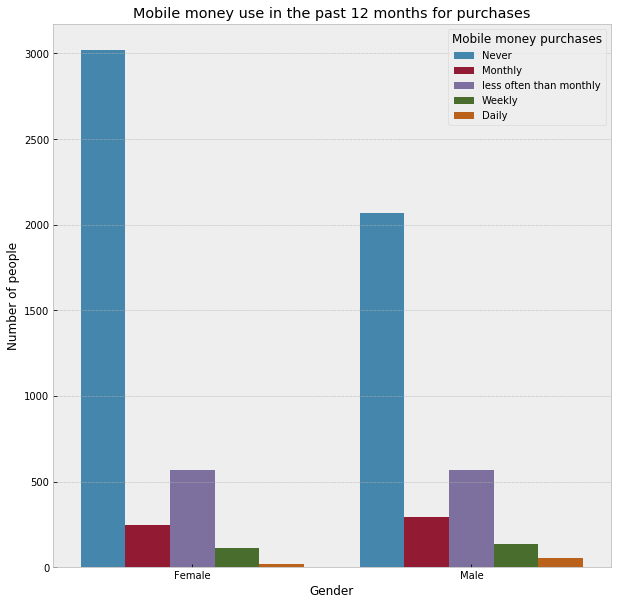

In [30]:
plt.figure(figsize=(10,10))
sns.countplot(x='Gender', hue= 'Mobile money purchases', data=tanza_data)
plt.ylabel('Number of people')
plt.title('Mobile money use in the past 12 months for purchases')

Text(0.5, 1.0, 'Mobile money use in the past 12 months for paying of bills')

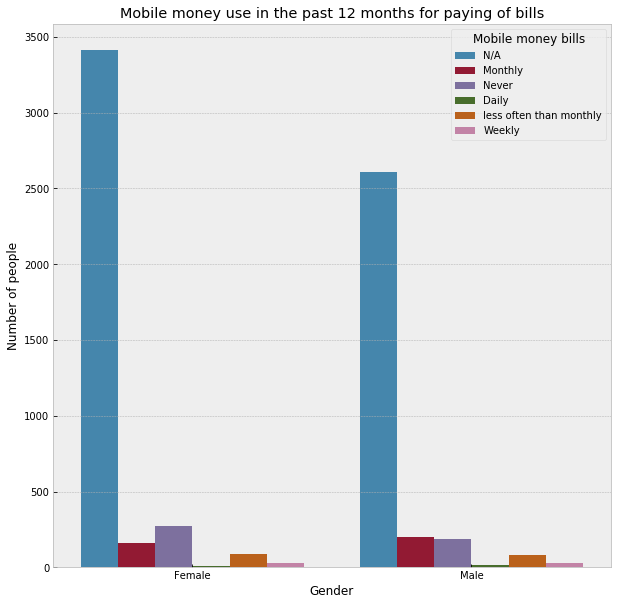

In [31]:
plt.figure(figsize=(10,10))
sns.countplot(x='Gender', hue= 'Mobile money bills', data=tanza_data)
plt.ylabel('Number of people')
plt.title('Mobile money use in the past 12 months for paying of bills')

Relationship betweeb how often mobile services are used and marital status

Text(0, 0.5, 'Number of people')

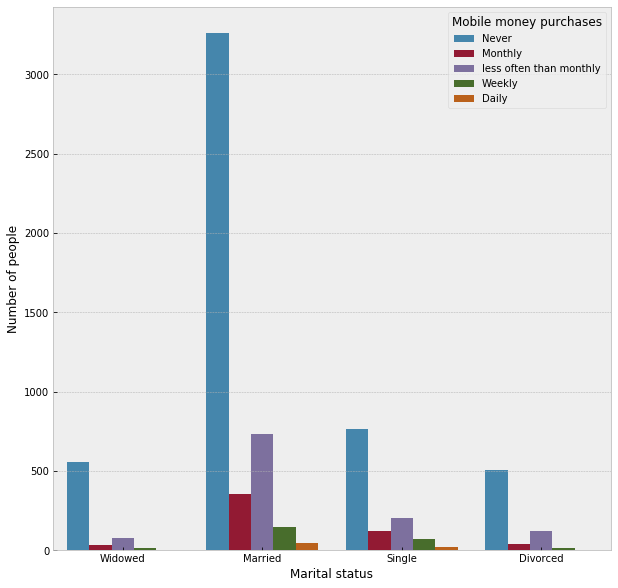

In [32]:
plt.figure(figsize=(10,10))
sns.countplot(x='Marital status', hue='Mobile money purchases', orient='h', data= tanza_data)
plt.ylabel('Number of people')

relationship between how often mobile services are used and land ownership

Text(0, 0.5, 'Number of people')

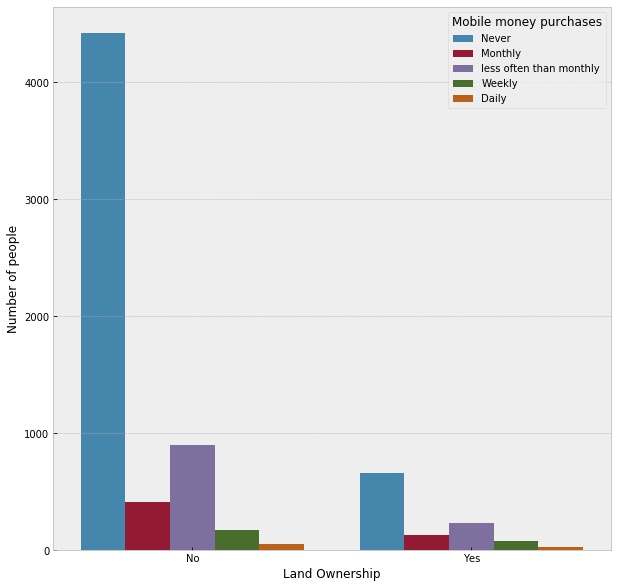

In [33]:
plt.figure(figsize=(10,10))
sns.countplot(x='Land Ownership', hue='Mobile money purchases', orient='h', data= tanza_data)
plt.ylabel('Number of people')

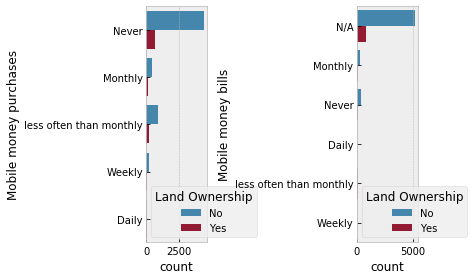

In [38]:
fig, axes = plt.subplots(1,2)
sns.countplot(hue='Land Ownership', y='Mobile money purchases', data=tanza_data,  ax=axes[0])
sns.countplot(hue='Land Ownership', y='Mobile money bills', data=tanza_data, ax=axes[1])
fig.tight_layout()


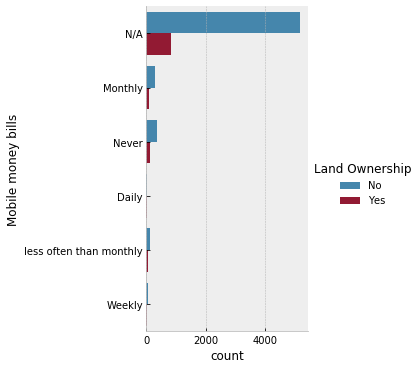

In [35]:
sns.catplot(hue='Land Ownership', y='Mobile money bills', data=tanza_data, kind='count')

In [36]:
relation_stats_none = []
#relation statuses with none
relation_stats_no_mm = []
#relationship statuses with no mobile money with one financial service
relation_stats_mm = []
#relationship statuses with mobile money only
relation_stats_both = []
#relationship statuses with both
for status in relation_stat:
    relation_stats_no_mm.append(len(status[status.mobile_money_classification == 0]))
    relation_stats_mm.append(len(status[status.mobile_money_classification == 1]))
    relation_stats_both.append(len(status[status.mobile_money_classification == 2]))



NameError: name 'relation_stat' is not defined

Text(0.5, 1.0, "Comparison of all Males' use of Financial Services")

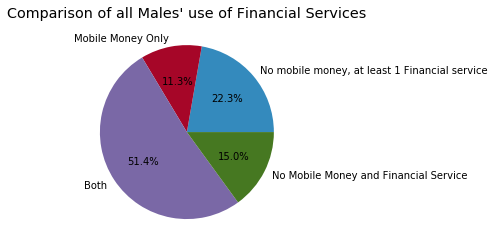

In [37]:
total_males = len(male[male.mobile_money == 1]) + len(male[male.mobile_money == 0])

l = len(male[male.mobile_money_classification == 1]) / total_males * 100
m = len(male[male.mobile_money_classification == 2]) / total_males * 100
n = len(male[male.mobile_money_classification == 3]) / total_males * 100
o = len(male[male.mobile_money_classification == 0]) / total_males * 100

labels= ['No mobile money, at least 1 Financial service', 'Mobile Money Only', 'Both', 'No Mobile Money and Financial Service']
plt.pie([l, m, n, o], explode=None,autopct='%1.1f%%', labels= labels)
plt.title("Comparison of all Males' use of Financial Services")

**TYPES OF INCOME**

In [ ]:
#defining the different types of sources of income for Males[male.Q8_8 == 1]
m_wages = male[male.Q8_1 == 1]
m_trading = male[male.Q8_2 == 1]
m_service = male[male.Q8_3 == 1]
m_casual = male[male.Q8_4 == 1]
m_rental = male[male.Q8_5 == 1]
m_interest = male[male.Q8_6 == 1]
m_pension = male[male.Q8_7 == 1]
m_grant = male[male.Q8_8 == 1]
m_handout = male[male.Q8_9 == 1]
m_extpayer = male[male.Q8_10 == 1]


m_sources_of_income = [m_wages, m_trading, m_service, m_casual, m_rental, m_interest, m_pension, m_grant, m_handout, m_extpayer] 


In [ ]:
plt.style.use('bmh')
m_sources_mm = []
#Males' souces of income with mobile money
m_sources_no_mm = []
# Males' sources of income without mobile money

for source in m_sources_of_income:
    m_sources_mm.append(len(source[source.mobile_money == 1]))
    m_sources_no_mm.append(len(source[source.mobile_money == 0]))

plt.figure(figsize = (20, 20))
plt.bar(np.arange(10), m_sources_mm, label= 'With Mobile Money')
plt.bar(np.arange(10), m_sources_no_mm, bottom= m_sources_mm, label='Without Mobile Money')
plt.xticks(np.arange(10), ['m_wages', 'm_trading', 'm_service', 'm_casual', 'm_rental', 'm_interest', 'm_pension', 'm_grant','m_handout', 'm_extpayer'])
plt.title("Males Sources of Income ")
plt.legend(loc="upper right")

**WOMEN TYPES OF INCOME**

In [ ]:
#defining the different types of sources of income for Females
fm_wages = female[female.Q8_1 == 1]
fm_trading = female[female.Q8_2 == 1]
fm_service = female[female.Q8_3 == 1]
fm_casual = female[female.Q8_4 == 1]
fm_rental = female[female.Q8_5 == 1]
fm_interest = female[female.Q8_6 == 1]
fm_pension = female[female.Q8_7 == 1]
fm_grant = female[female.Q8_8 == 1]
fm_handout = female[female.Q8_9 == 1]
fm_extpayer = female[female.Q8_10 == 1]


fm_sources_of_income = [m_wages, m_trading, m_service, m_casual, m_rental, m_interest, m_pension, m_grant, m_handout, m_extpayer] 


In [ ]:
#reationship statuses without mobile money
#defining the different types of sources of income for Males[male.Q8_8 == 1]
m_wages = male[male.Q8_1 == 1]
m_trading = male[male.Q8_2 == 1]
m_service = male[male.Q8_3 == 1]
m_casual = male[male.Q8_4 == 1]
m_rental = male[male.Q8_5 == 1]
m_interest = male[male.Q8_6 == 1]
m_pension = male[male.Q8_7 == 1]
m_grant = male[male.Q8_8 == 1]
m_handout = male[male.Q8_9 == 1]
m_extpayer = male[male.Q8_10 == 1]


m_sources_of_income = [m_wages, m_trading, m_service, m_casual, m_rental, m_interest, m_pension, m_grant, m_handout, m_extpayer] 


**FEMALES COMPARISON TO MOBILE CLASSIFICATION**

**AGE**

**ppropriate graphs to visually represent the relationship between how often mobile services are used and age, gender, marital status, land ownership and type of income.



In [ ]:
#Q16 and Q17 deal with how often interviwees used mobile money in the past 
# definig the categories to how ofteen its been ued for the past 12 months

#not_app = tanza_data[tanza_data.Q16 == -1] + tanza_data[tanza_data.Q.17]
#not_app


In [ ]:
freq_of_use = tanza_data.groupby("Q16")
freq_of_use["Q16"].describe()



In [ ]:
freq_of_use1 = tanza_data.groupby("Q17")
freq_of_use1.describe()

In [ ]:
# A
sns.catplot(x= 'Q6', y= 'mobile_money_classification', kind= 'bar', data= tanza_data)
plt.xlabel("Land Ownership")

plt.ylabel('Number of People')
plt.title('Land Ownership in Comparison to Mobile money Classification')

In [ ]:
#defining totals of frequency 

m_never = len(tanza_data[tanza_data[""] == 1])+ len(tanza_data[tanza_data["Q17"] == 1])
daily = len(tanza_data[tanza_data["Q16"] == 2])+ len(tanza_data[tanza_data["Q17"] == 2])
weekly = len(tanza_data[tanza_data["Q16"] == 3]) + len(tanza_data[tanza_data["Q17"] == 3])
monthly = len(tanza_data[tanza_data["Q16"] == 4]) + len(tanza_data[tanza_data["Q17"] == 4])
not_often = len(tanza_data[tanza_data["Q16"] == 5]) + len(tanza_data[tanza_data["Q17"] == 5])

how_often = [m_never, daily, weekly, monthly, not_often] 

In [ ]:
tanza_data.head()

In [ ]:
#How often mobile money is used for purchases and age
sns.catplot(x= 'Mobile money purchases', y= 'Age',kind= 'boxen', data= tanza_data)
plt.title('How often mobile money is used for purchases' )

In [ ]:
#how often mobile money is used for bills and age
sns.catplot(x= 'Mobile money bills', y= 'Age',kind= 'boxen', data= tanza_data)
plt.ylabel('How often mobile money is used')
plt.title('How often mobile money is used for bills')

In [ ]:
sns.catplot(x='',kind= 'count', hue= 'gender', data= tanza_data)
plt.xlabel("Land Ownership")
plt.ylabel('Number of People')
plt.title('Age in Comparison to Mobile money Classification')